In [1]:
#bibliotecasd que iremos usar
import os, glob
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import PIL
from PIL import Image
import re
import numpy as np

In [2]:
#definindo nossas classes de raças alvos de forma global
class_names_races = [
    'Abyssinian',
    'american_bulldog',
    'american_pit_bull_terrier',
    'basset_hound',
    'beagle',
    'Bengal',
    'Birman',
    'Bombay',
    'boxer',
    'British_Shorthair',
    'chihuahua',
    'Egyptian_Mau',
    'english_cocker_spaniel',
    'english_setter',
    'german_shorthaired',
    'great_pyrenees',
    'havanese',
    'japanese_chin',
    'keeshond',
    'leonberger',
    'yorkshire_terrier',
    'wheaten_terrier',
    'staffordshire_bull_terrier'
    'Sphynx',
    'Siamese',
    'shiba_inu',
    'scottish_terrier',
    'samoyed',
    'saint_bernard',
    'Russian_Blue',
    'Ragdoll',
    'Pug',
    'pomeranian',
    'Persian',
    'newfoundland',
    'miniature_pinscher'
    'Maine_Coon',
    'leonberger',
    'keeshond',
]

In [3]:
class_name_animal = {
    "dogs": [
        'american_bulldog',
        'american_pit_bull_terrier',
        'basset_hound',
        'beagle',
        'boxer',
        'chihuahua',
        'english_cocker_spaniel',
        'english_setter',
        'german_shorthaired',
        'great_pyrenees',
        'havanese',
        'japanese_chin',
        'keeshond',
        'leonberger',
        'yorkshire_terrier',
        'wheaten_terrier',
        'staffordshire_bull_terrier',
        'shiba_inu',
        'scottish_terrier',
        'samoyed',
        'saint_bernard',
        'Pug',
        'pomeranian',
        'newfoundland',
        'miniature_pinscher',
        'leonberger',
        'keeshond'
    ],
    "cats": [
        'Abyssinian',
        'Bengal',
        'Birman',
        'Bombay',
        'British_Shorthair',
        'Egyptian_Mau',
        'Sphynx',
        'Siamese',
        'Russian_Blue',
        'Ragdoll',
        'Persian',
        'Maine_Coon'
    ]
}


In [4]:
dataset_dir = os.path.join(os.getcwd(),'cats_and_dogs')

In [5]:
dataset_train_dir = os.path.join(dataset_dir,'train')

In [6]:
dataset_train_cats_len = len(os.listdir(os.path.join(dataset_train_dir,'cats')))

In [7]:
dataset_train_dogs_len = len(os.listdir(os.path.join(dataset_train_dir,'dogs')))

In [8]:
dataset_validation_dir = os.path.join(dataset_dir,'validation')

In [9]:
dataset_validation_cats_len = len(os.listdir(os.path.join(dataset_validation_dir,'cats')))

In [10]:
dataset_validation_dogs_len = len(os.listdir(os.path.join(dataset_validation_dir,'dogs')))

In [11]:
print('Train cats %s' % dataset_train_cats_len)
print('Train dogs %s' % dataset_train_dogs_len)
print('Validation cats %s' % dataset_validation_cats_len)
print('Validation dogs %s' % dataset_validation_dogs_len)

Train cats 1702
Train dogs 3493
Validation cats 701
Validation dogs 1497


In [12]:
#preprocessamento de dados
#configuraçõe siniciais par aque o modelo funcione corretemante
#aplicando reescalling da imagem para 160x160 -> de forma arbitraria
#aplciandpo filtro rgb para todas

In [13]:
#variaveis para trataemnto de imagens
img_width = 160 #valor arbitrario
img_heigth = 160 #valor arbitrario
img_color_channel = 3
img_color_channel_size = 255
img_size = (img_width, img_heigth)
img_shape = img_size + (img_color_channel,)


##variaveis usados no treinamento
batch_size = 32 #quantidade de features trazidas por vez do dataset
epochs = 5 #numeor de vezez que o dataset será percorrido
            #por uma questão de limitação de hardware vamos manter 5
learning_rate = 0.0001 #taxa e aprendizagem

class_name = ['cats','dogs'] #problema de classificação
#como não queremos ver um númeor ao final do processo defimos o 0 como cat e 1 para dog na mesma ordem do array

In [14]:
#criando dataset de treino
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir, #local do diretórorio
    image_size = img_size, # as imagens fora do formato padrão serão redefinidas para esse com um reescaling
    batch_size = batch_size,#quantidade de features trazidas por vez do dataset
    shuffle = True,
    interpolation = "gaussian" #interpolação gausiana
)

Found 5195 files belonging to 2 classes.


In [15]:
#criando dataset de validação
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir, #local do diretórorio
    image_size = img_size, # as imagens fora do formato padrão serão redefinidas para esse com um reescaling
    batch_size = batch_size,#quantidade de features trazidas por vez do dataset
    shuffle = True,
    interpolation = "gaussian" #interpolação gausiana
)

Found 2195 files belonging to 2 classes.


In [20]:
#criando dataset de test
dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batch = dataset_validation_cardinality//5

In [21]:
dataset_test = dataset_validation.take(dataset_validation_batch)
dataset_validation = dataset_validation.skip(dataset_validation_batch)

In [22]:
print('validation dataset cardinality: %d' % tf.data.experimental.cardinality(dataset_validation))
print('test dataset cardinality: %d' % tf.data.experimental.cardinality(dataset_test))

validation dataset cardinality: 56
test dataset cardinality: 13


In [23]:
#cardinalidade inicial = numero de feature / batch size 

In [24]:
#plotando algums imagens do dataset
def plot_dataset(dataset):
    plt.gcf().clear()
    plt.figure(figsize=(15,15)) #as imagens estão fo formato quadrado, sem problemas aqui
    for features, labels in dataset.take(1):
        for i in range(9):
            plt.subplot(3,3,i+1)
            plt.axis('off')
            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_name[labels[i]])

<Figure size 432x288 with 0 Axes>

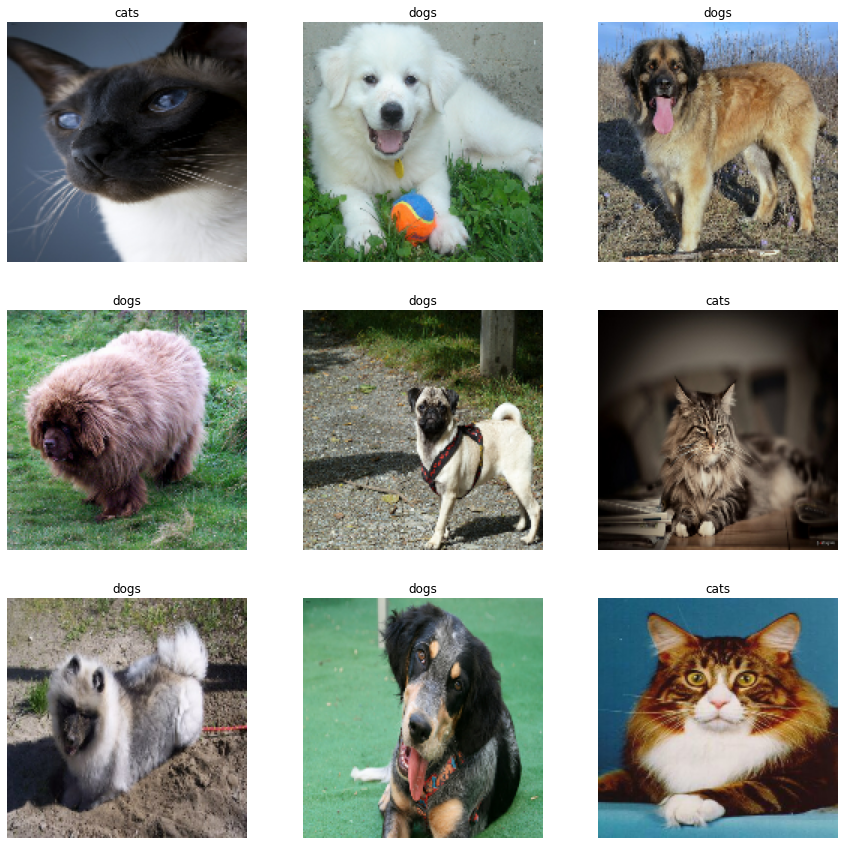

In [25]:
#plot dataset de trino
plot_dataset(dataset_train)

<Figure size 432x288 with 0 Axes>

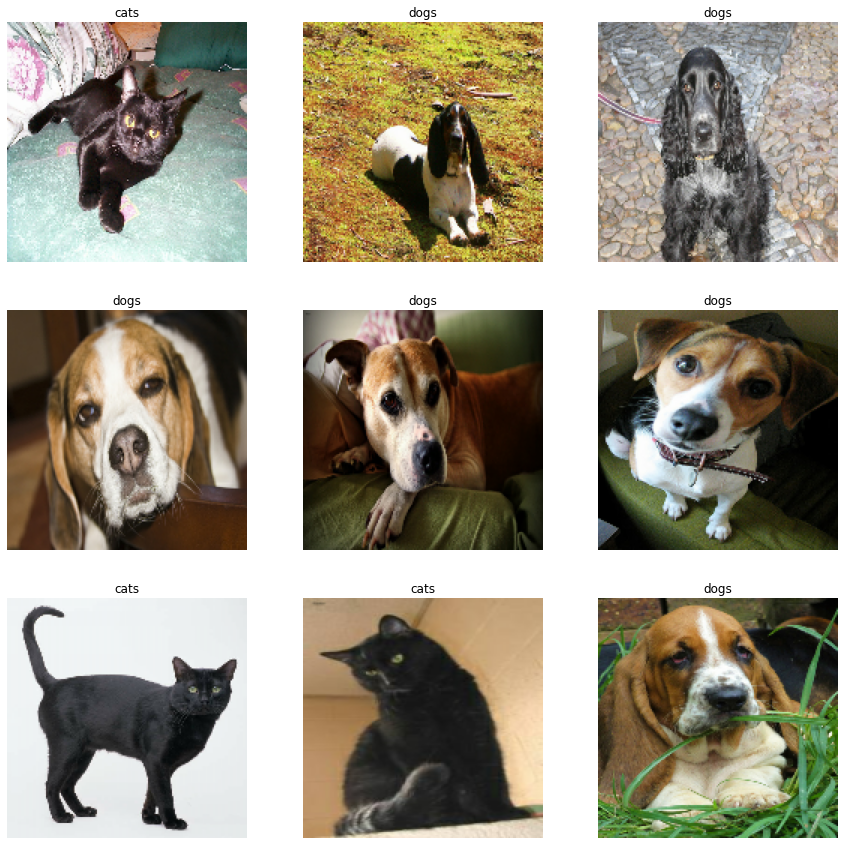

In [26]:
#plot dataset de validação
plot_dataset(dataset_validation)

In [50]:
#aplicando data_augmentation -> o modelo incial sofreu overfitting
#fazendo isso podemos aumentar o numero de features sem necessariamente conseguir novas features
#isso ira fazer o modelo olhar diferentes imagens a cadas vez que for treinado
#no primeiro cadso tivemos overfitting, por essa razão estamos usando essa camada agora

data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

In [51]:
def plot_dataset_augmentation(dataset):
    plt.gcf().clear()
    plt.figure(figsize=(15,15))
    for features, _ in dataset.take(1):
        feature = features[0]
        for i in range(9):
            feature_data_augmentation = data_augmentation(tf.expand_dims(feature, 0))
            plt.subplot(3,3,i+1)
            plt.axis('off')
            plt.imshow(feature_data_augmentation[0]/img_color_channel_size)

<Figure size 432x288 with 0 Axes>

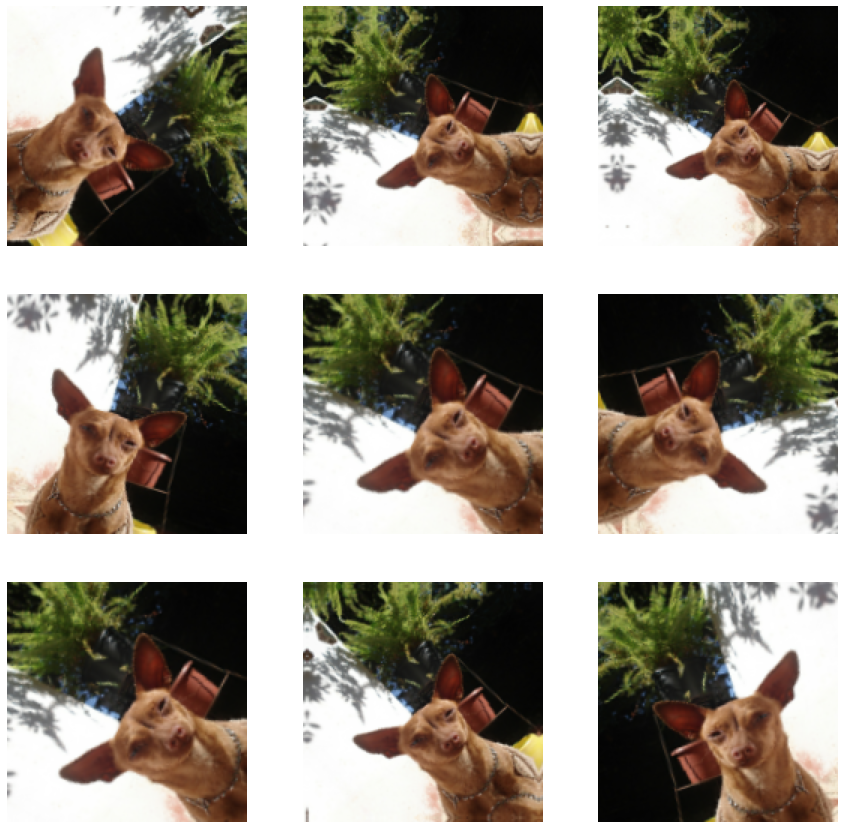

In [53]:
plot_dataset_augmentation(dataset_validation)
#a partir de uma imagem outras foram geradas de forma randomica

In [27]:
#criando modelo com uma rede neural convulacional
#modelo sequencial em camadas


model = tf.keras.models.Sequential([
    #aplica rescaling da imagen (160,160, 3)
    #não queremos que os valores vão de 0 a 255, apenas de 0 a 1
    #isso é chamado de normalização de valores
    tf.keras.layers.Rescaling(
        1. /img_color_channel_size,
        input_shape = img_shape
    ),
    #filters,kernel_size,paddingactivation
    #activation-> função de ativação
    #funções de ativaçoes disponivel em  https://www.tensorflow.org/api_docs/python/tf/keras/activations
    #função relu aplica a função de ativação da unidade linear retificada. Mehlor no entendimento desse caso
    #função relu zera valores negativos e parmanece os positivos
    #camada convulacional de tamanho 16,
    #essa camada será passada 16x, com kernel de tamanho 3
    tf.keras.layers.Conv2D(16,3, padding='same',activation='relu'),
    #dados dispostos bidemnsionalmente
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3, padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3, padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    #Achata a entrada.
    #aplica algoritmo de "achatamento"
    tf.keras.layers.Flatten(),
    #inpu -> inteiro,acvation function
    #input -> dimensionalidade do espaço d esaida do modelo treinado
    tf.keras.layers.Dense(128, activation='relu'),
    #queremos apenas um valor de saida do nosso modelo por isso aplicamos 1 ao alor de input
    #sigmoid ela retorna um valor entre -1 e 1
    tf.keras.layers.Dropout(0.2), #o modleo inicial sofreu overfiting,
                                 #essa camada garatira que nem todos os neuronios serão usadoas
    tf.keras.layers.Dense(1, activation='sigmoid')#ativação sigmoidal, sigmoid(x) = 1 / (1 + exp(-x)).
])

In [28]:
#metricas que quereomos ver durante o processo de treinamento
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss = tf.keras.losses.BinaryFocalCrossentropy(),#função de custo otimizado quando a saida é binaria
    metrics=['accuracy'] #metrica de acuaracia ou precisão
)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        3

In [32]:
#aplicando treinamento de fato

history = model.fit(
    dataset_train,
    validation_data=dataset_validation,
    epochs=epochs
)

Epoch 1/5
163/163 [==============================] - 504s 3s/step - loss: 0.1537 - accuracy: 0.6726 - val_loss: 0.1429 - val_accuracy: 0.6920
Epoch 2/5
163/163 [==============================] - 515s 3s/step - loss: 0.1367 - accuracy: 0.7263 - val_loss: 0.1382 - val_accuracy: 0.7201
Epoch 3/5
163/163 [==============================] - 520s 3s/step - loss: 0.1261 - accuracy: 0.7594 - val_loss: 0.1386 - val_accuracy: 0.7274
Epoch 4/5
163/163 [==============================] - 296s 2s/step - loss: 0.1183 - accuracy: 0.7767 - val_loss: 0.1371 - val_accuracy: 0.7392
Epoch 5/5
163/163 [==============================] - 348s 2s/step - loss: 0.1094 - accuracy: 0.8077 - val_loss: 0.1397 - val_accuracy: 0.7291


In [ ]:
#aplicar métricas ao dataset de validação para vermos se o modelo está bom ou não

In [ ]:
#plotando as predições do modelo

In [36]:
def plot_dataset_pred(dataset):
    features, labels = dataset.as_numpy_iterator().next()
    prediction = model.predict_on_batch(features).flatten()
    prediction = tf.where(prediction < 0.5 , 0, 1)
    
    print('labels: %s' % labels)
    print('predictions: %s' % prediction.numpy())
    
    plt.gcf().clear()
    plt.figure(figsize = (15,15))
    
    for i in range(9):
        plt.subplot(3,3,i+1)
        
        plt.imshow(features[i].astype('uint8'))
        plt.title(class_name[prediction[i]])

labels: [1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
predictions: [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1]


<Figure size 432x288 with 0 Axes>

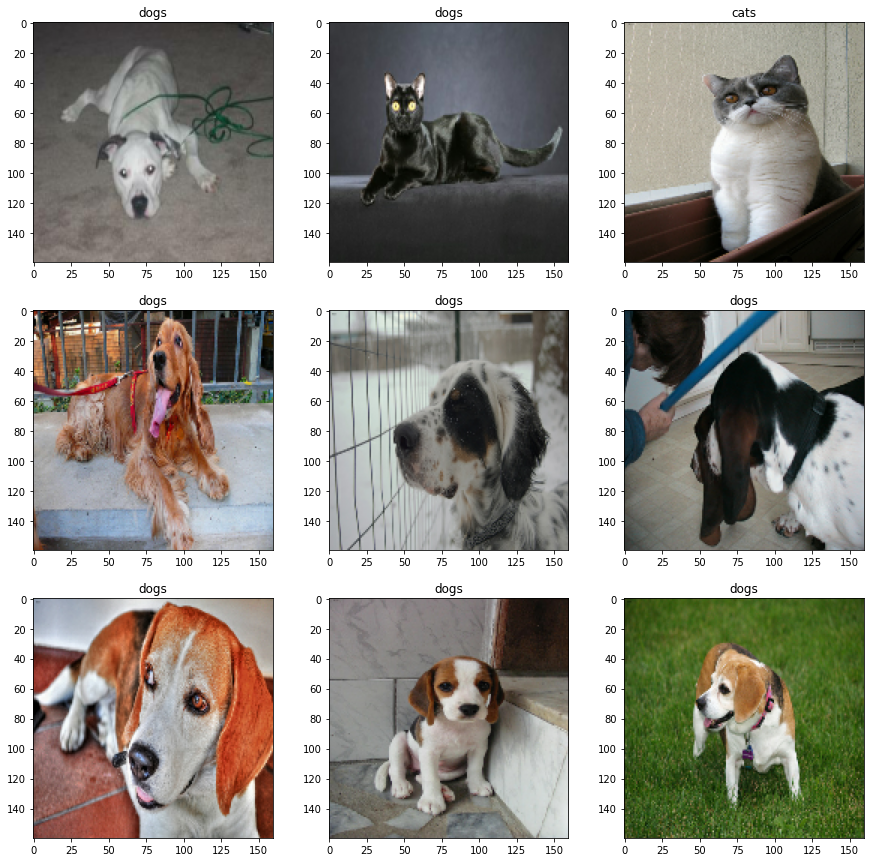

In [37]:
plot_dataset_pred(dataset_validation)

In [38]:
#salvando o modelo
model.save('../model')

INFO:tensorflow:Assets written to: ../model\assets


INFO:tensorflow:Assets written to: ../model\assets


In [47]:
#plotando modelo acuraci x erro x esperado
def plot_model():
    acuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epoch_range = range(epochs)
    plt.gcf().clear()
    plt.figure(figsize=(15,15))
    
    plt.subplot(1,2,1)
    plt.title('Training and vvalidation acuracy')
    plt.plot(epoch_range, acuracy, label= 'training accuracy')
    plt.plot(epoch_range, val_accuracy, label= 'validation accuracy')
    plt.legend(loc = 'lower right')
    
    plt.subplot(1,2,2)
    plt.title('training and validation loss')
    plt.plot(epoch_range, loss, label = "trainig loss")
    plt.plot(epoch_range, val_loss, label = "validation loss")
    plt.legend(loc = 'lower right')
    plt.show()

<Figure size 432x288 with 0 Axes>

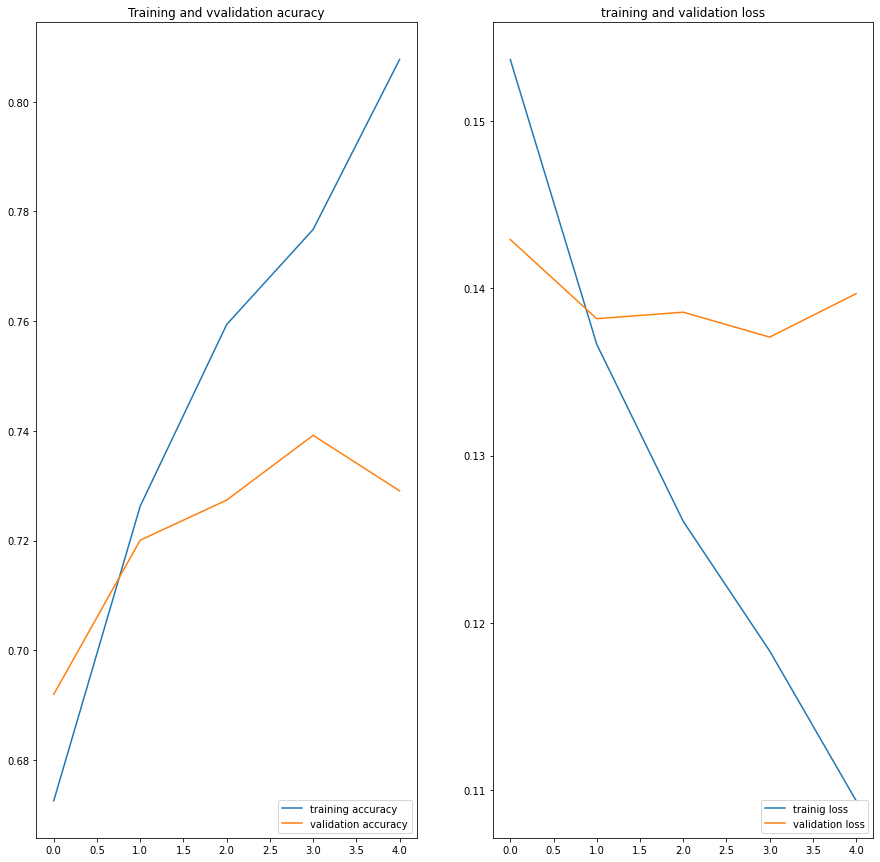

In [48]:
plot_model()

In [49]:
#note que há uma disparidade  muito grande o treinamento e a acuracia no dataset de treino e uma erro muito grande no teste
#isso é claramente um sintoma de overfiting
#sugestão de ajuste -> diminuir a quantidade de parametros nas camadas construtivas do modelo

In [80]:
#recriando o modelo e trinando novamente
#criando modelo com uma rede neural convulacional
#modelo sequencial em camadas


model = tf.keras.models.Sequential([
    #aplica rescaling da imagen (160,160, 3)
    #não queremos que os valores vão de 0 a 255, apenas de 0 a 1
    #isso é chamado de normalização de valores
    tf.keras.layers.Rescaling(
        1. /img_color_channel_size,
        input_shape = img_shape
    ),
    data_augmentation,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')#ativação sigmoidal, sigmoid(x) = 1 / (1 + exp(-x)).
])

In [77]:
#aplicando um novo valor de rating learnng
learning_rate = 0.0001

In [1]:
#metricas que quereomos ver durante o processo de treinamento
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate*10),#multiplicação arbitraria
    loss = tf.keras.losses.BinaryFocalCrossentropy(),#função de custo otimizado quando a saida é binaria
    metrics=['accuracy'] #metrica de acuaracia ou precisão
)

NameError: name 'model' is not defined

In [82]:
history = model.fit(
    dataset_train,
    validation_data=dataset_validation,
    epochs=5
)

Epoch 1/5
163/163 [==============================] - 1210s 7s/step - loss: 2.4848 - accuracy: 0.6608 - val_loss: 0.1675 - val_accuracy: 0.6802
Epoch 2/5
163/163 [==============================] - 1359s 8s/step - loss: 0.1652 - accuracy: 0.6724 - val_loss: 0.1626 - val_accuracy: 0.6790
Epoch 3/5
163/163 [==============================] - 952s 6s/step - loss: 0.1618 - accuracy: 0.6724 - val_loss: 0.1600 - val_accuracy: 0.6802
Epoch 4/5
163/163 [==============================] - 1017s 6s/step - loss: 0.1604 - accuracy: 0.6724 - val_loss: 0.1590 - val_accuracy: 0.6802
Epoch 5/5
163/163 [==============================] - 985s 6s/step - loss: 0.1599 - accuracy: 0.6724 - val_loss: 0.1595 - val_accuracy: 0.6745


0.0001

<Figure size 432x288 with 0 Axes>

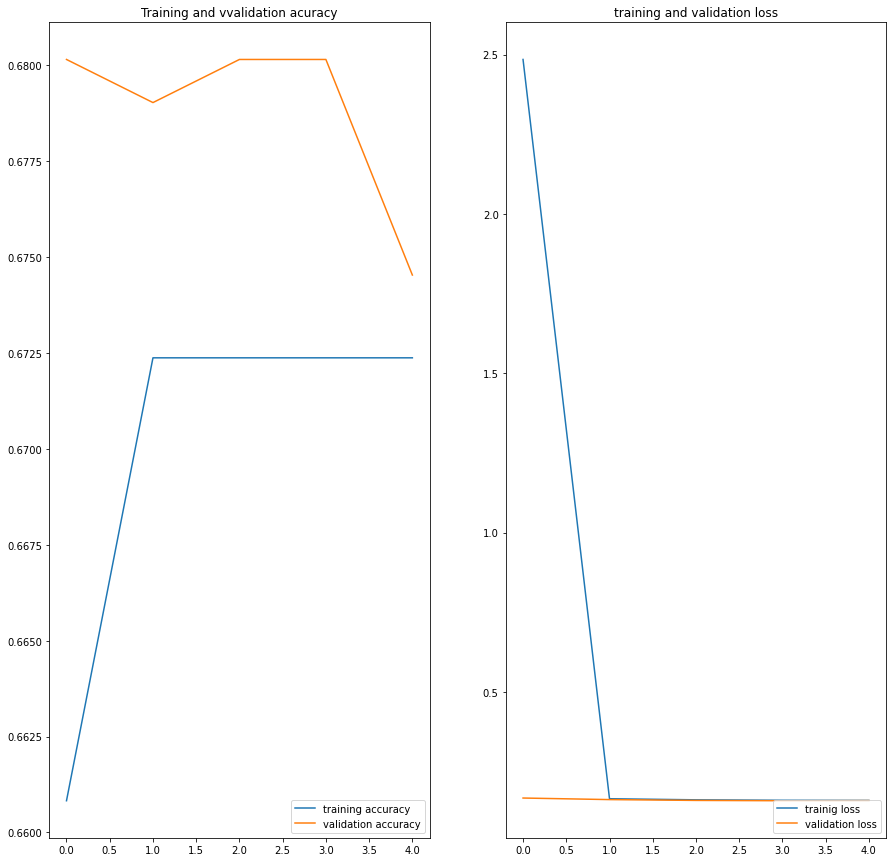

In [83]:
plot_model()

In [84]:
#modelo bom porém ruim kkkkkk